In [49]:
import numpy as np
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#import sklearn.metrics as skm

In [50]:
df = pd.read_csv("diabetes_explore2.csv")

In [52]:
print(df.head())   

   preg  plas  pres  skin  insu  mass   pedi  age  class age_level
0     6   148    72    35     0  33.6  0.627   50      1       50s
1     1    85    66    29     0  26.6  0.351   31      0       30s
2     8   183    64     0     0  23.3  0.672   32      1       30s
3     1    89    66    23    94  28.1  0.167   21      0       20s
4     0   137    40    35   168  43.1  2.288   33      1       30s


In [53]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [54]:
df.describe() #display mean, std, min, max

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
df.age_level.value_counts()

20s    396
30s    165
40s    118
50s     57
60+     32
Name: age_level, dtype: int64

In [56]:
df2 = df.copy(deep=True)
df2['plas']= df['plas'].replace(0,np.NaN)
df2['pres'] = df['pres'].replace(0,np.NaN)
df2['skin'] = df['skin'].replace(0,np.NaN)
df2['insu'] = df['insu'].replace(0, np.NaN)
df2['mass'] = df['mass'].replace(0, np.NaN)

In [58]:
##count how many NAs are in each column
plas_na = np.isnan(df2['plas']).sum()
print(plas_na , "NAs in plas")
pres_na = np.isnan(df2['pres']).sum()
print(pres_na , "NAs in pres")
skin_na = np.isnan(df2['skin']).sum()
print(skin_na , "NAs in skin")
insu_na = np.isnan(df2['insu']).sum()
print(insu_na , "NAs in insu")
mass_na = np.isnan(df2['mass']).sum()
print(plas_na , "NAs in mass")

5 NAs in plas
35 NAs in pres
227 NAs in skin
374 NAs in insu
5 NAs in mass


In [9]:
print (df2.info())  #int has been changed to float bc of NaN substitutions 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB
None


In [59]:
print (df2.median()) #calculate medians to compare with means

preg       3.0000
plas     117.0000
pres      72.0000
skin      29.0000
insu     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


In [60]:
df2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


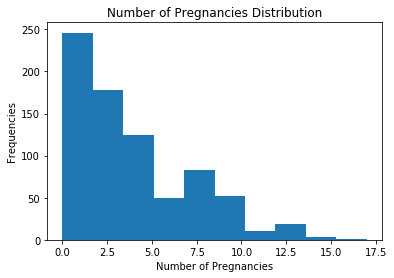

In [61]:
##preg
#sns.distplot(df2["preg"], bins= 20)
plt.hist(df2["preg"])
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequencies")
plt.title("Number of Pregnancies Distribution")
plt.show()

C:\Users\sharo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sharo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


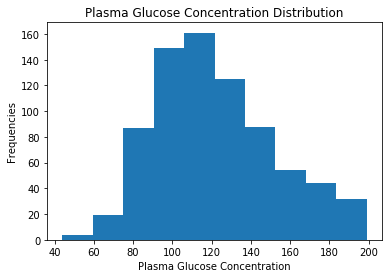

In [62]:
##plas
plt.hist(df2["plas"])
plt.xlabel("Plasma Glucose Concentration")
plt.ylabel("Frequencies")
plt.title("Plasma Glucose Concentration Distribution")
plt.show()

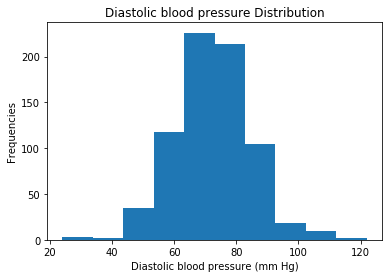

In [63]:
##pres
plt.hist(df2["pres"])
plt.xlabel("Diastolic blood pressure (mm Hg)")
plt.ylabel("Frequencies")
plt.title("Diastolic blood pressure Distribution")
plt.show()

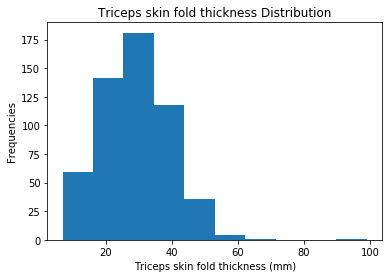

In [64]:
##skin
plt.hist(df2["skin"])
plt.xlabel("Triceps skin fold thickness (mm)")
plt.ylabel("Frequencies")
plt.title("Triceps skin fold thickness Distribution")
plt.show()

##skin fold thickness at 0 - impossible data 

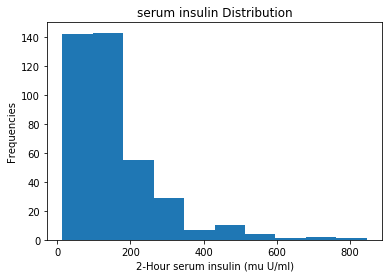

In [65]:
##insu
plt.hist(df2["insu"])
plt.xlabel("2-Hour serum insulin (mu U/ml)")
plt.ylabel("Frequencies")
plt.title("serum insulin Distribution")
plt.show()

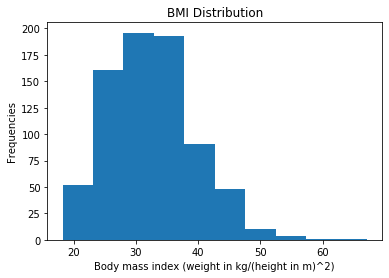

In [66]:
##bmi
plt.hist(df2["mass"])
plt.xlabel("Body mass index (weight in kg/(height in m)^2)")
plt.ylabel("Frequencies")
plt.title("BMI Distribution")
plt.show()

##bmi level at 0 - impossible data 

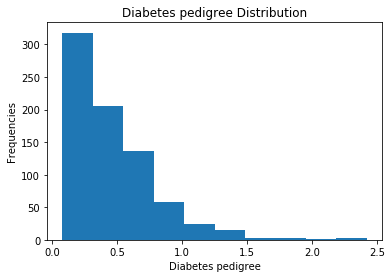

In [67]:
##pedi
plt.hist(df2["pedi"])
plt.xlabel("Diabetes pedigree")
plt.ylabel("Frequencies")
plt.title("Diabetes pedigree Distribution")
plt.show()

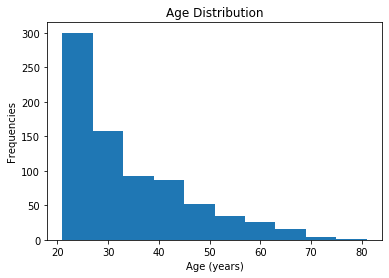

In [68]:
##age
#sns.distplot(df2['age'])
plt.hist(df2["age"])
plt.xlabel("Age (years)")
plt.ylabel("Frequencies")
plt.title("Age Distribution")
plt.show()

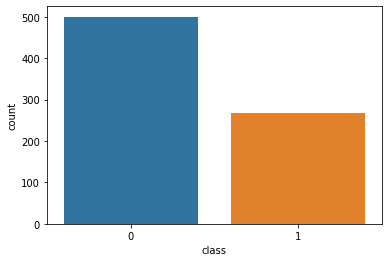

In [69]:
##class
sns.countplot(x="class", data= df2)
#df['class'].value_counts().plot(kind='bar')
#plt.xlabel("Diabetes class")
#plt.ylabel("counts")
#plt.title("Diabetes Class Distribution")
#plt.show()

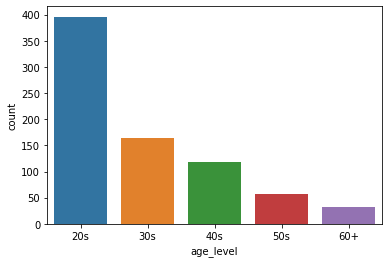

In [73]:
##age level
sns.countplot(x="age_level", data = df2, order=['20s','30s','40s', '50s','60+'])
#df['age_level'].value_counts().plot(kind='bar')
#plt.xlabel("Age level")
#plt.ylabel("counts")
#plt.title("Age Level Distribution")

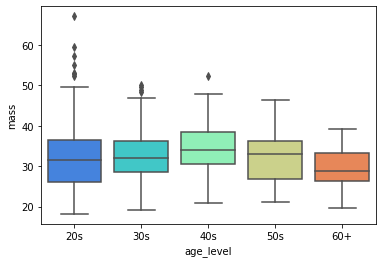

In [72]:
sns.boxplot(x='age_level',y='mass',data=df2, palette='rainbow',
           order=['20s','30s','40s', '50s','60+'])

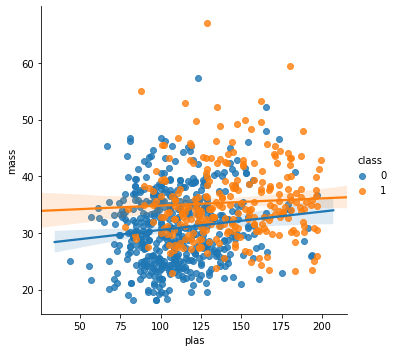

In [77]:
sns.lmplot( x="plas", y="mass", data=df2, fit_reg=True, hue='class')